In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'
study = flotilla.embark('singlecell_pnm_figure4_voyages', flotilla_dir=flotilla_dir)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-03-24 14:50:51	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure4_voyages/datapackage.json
2016-03-24 14:50:51	Parsing datapackage to create a Study object
2016-03-24 14:51:36	Initializing Study
2016-03-24 14:51:36	Initializing Predictor configuration manager for Study
2016-03-24 14:51:36	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-03-24 14:51:36	Added ExtraTreesClassifier to default predictors
2016-03-24 14:51:36	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-03-24 14:51:36	Added ExtraTreesRegressor to default predictors
2016-03-24 14:51:36	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-03-24 14:51:36	Added GradientBoostingClassifier to default predictors
2016-03-24 14:51:36	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gra

In [2]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [3]:
phenotype_modalities = study.supplemental.modalities_tidy.set_index('event_id').groupby('phenotype')['modality']

In [4]:
study.supplemental.waypoints = study.supplemental.waypoints.rename(columns={'Unnamed: 1': 'event_id'}).set_index('event_id', append=True)

In [5]:
study.supplemental.waypoints.max()

0    1
1    1
dtype: float64

In [6]:
s = study.supplemental.waypoints.apply(lambda x: x[1] <= -x[0] + 0.5, axis=1)
ind = study.supplemental.waypoints.iloc[:, 1]  <= -study.supplemental.waypoints.iloc[:, 0] + 0.5
waypoints_lower_triangle = study.supplemental.waypoints.loc[ind]
s.sum()

72

In [7]:
study.supplemental.waypoints.loc[s].groupby(level=0, axis=0).size()

phenotype
MN       2
NPC      7
iPSC    63
dtype: int64

In [8]:
from astrolabe import waypointplot

In [9]:
study.supplemental.waypoints.head()

0  \
phenotype event_id                                                           
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  2.220446e-16   
          exon:chr10:102286732-102286831:-@exon:chr10:102...  2.220446e-16   
          exon:chr10:103360960-103361093:+@exon:chr10:103...  9.499998e-01   
          exon:chr10:103563492-103563776:-@exon:chr10:103...  4.545454e-02   
          exon:chr10:103567487-103567658:-@exon:chr10:103...  2.220446e-16   

                                                                     1  
phenotype event_id                                                      
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  1.000000  
          exon:chr10:102286732-102286831:-@exon:chr10:102...  1.000000  
          exon:chr10:103360960-103361093:+@exon:chr10:103...  0.050000  
          exon:chr10:103563492-103563776:-@exon:chr10:103...  0.954545  
          exon:chr10:103567487-103567658:-@exon:chr10:103...  1.000000

In [10]:
figure_folder = '{}/from_multimodal_to_extremes'.format(folder)
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes': No such file or directory


In [11]:
waypoint_folder = '{}/waypoints'.format(figure_folder)
! mkdir $waypoint_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes/waypoints': No such file or directory


In [12]:
sns.set(style='ticks', context='paper')

IOError: [Errno 2] No such file or directory: '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes/waypoints/waypoint_lower_triangle_all.pdf'

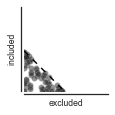

In [13]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))
waypointplot(study.supplemental.waypoints.loc[s], kind='scatter', ax=ax, color='#262626')
ax.plot([0, 0.5], [0.5, 0], color='k', linestyle='--')
fig.savefig('{}/waypoint_lower_triangle_all.pdf'.format(waypoint_folder))

In [ ]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))

for celltype, df in waypoints_lower_triangle.groupby(level=0):
    df.index = df.index.droplevel(0)
    
    features_groupby = phenotype_modalities.get_group(celltype)
    waypointplot(df, kind='scatter', ax=ax, features_groupby=features_groupby)
    
ax.plot([0, 0.5], [0.5, 0], color='k', linestyle='--')
ax.set(title=celltype)
fig.savefig('{}/waypoint_lower_triangle_modalities.pdf'.format(waypoint_folder))

In [ ]:
for celltype, df in waypoints_lower_triangle.groupby(level=0):
    df.index = df.index.droplevel(0)
    
    color = study.phenotype_to_color[celltype]
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    
    waypointplot(df, kind='scatter', ax=ax, color=color)
    ax.plot([0, 0.5], [0.5, 0], color='k', linestyle='--')
    ax.set(title=celltype)
    fig.savefig('{}/waypoint_lower_triangle_{}.pdf'.format(waypoint_folder, celltype))

In [ ]:
figure_folder

In [ ]:
for celltype, df in waypoints_lower_triangle.groupby(level=0):
    df.index = df.index.droplevel(0)
    
    features_groupby = phenotype_modalities.get_group(celltype)
    for event in df.index:
        modality = features_groupby[event]
        gene_name = study.splicing.feature_data['gene_name'][event]
        study.plot_event(event, sample_subset='~outlier')
        fig = plt.gcf()
        fig.savefig('{}/violinplots/{}_{}_{}_{}.pdf'.format(figure_folder, celltype, modality, gene_name, event))

In [ ]:
for celltype, df in waypoints_lower_triangle.groupby(level=0):
    df.index = df.index.droplevel(0)
    
    color = study.phenotype_to_color[celltype]
    fig, ax = plt.subplots(figsize=(2, 2))
    features_groupby = phenotype_modalities.get_group(celltype)
    
    waypointplot(df, kind='scatter', ax=ax, features_groupby=features_groupby)
    ax.plot([0, 0.5], [0.5, 0], color='k', linestyle='--')
    ax.set(title=celltype)
    fig.savefig('{}/waypoint_lower_triangle_{}_modalities.pdf'.format(waypoint_folder, celltype))

In [ ]:
ipsc_waypoints_lower_triangle = waypoints_lower_triangle.loc['iPSC']
ipsc_waypoints_lower_triangle.head()

In [ ]:
mn_waypoints = study.supplemental.waypoints.loc['MN']
mn_waypoints.head()

In [ ]:
ipsc_lower_triangle_in_mn_waypoints = mn_waypoints.loc[ipsc_waypoints_lower_triangle.index]

In [ ]:
study.supplemental.ipsc_lower_triangle_in_mn_waypoints = ipsc_lower_triangle_in_mn_waypoints

In [ ]:
study.save('singlecell_pnm_figure4_voyages_lower_triangle')

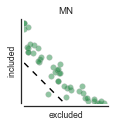

In [22]:

fig, ax = plt.subplots(figsize=(1.5, 1.5))
waypointplot(ipsc_lower_triangle_in_mn_waypoints, kind='scatter', ax=ax, color=study.phenotype_to_color['MN'])
ax.plot([0, 0.5], [0.5, 0], color='k', linestyle='--')
ax.set(title='MN')
fig.savefig('{}/waypoints_lower_triangle_in_ipsc_to_mn_scatter.pdf'.format(waypoint_folder))

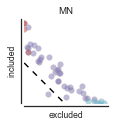

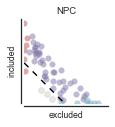

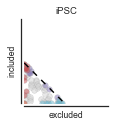

In [23]:
for celltype, df in waypoints_lower_triangle.groupby(level=0):
    df = study.supplemental.waypoints.loc[celltype].loc[ipsc_lower_triangle_in_mn_waypoints.index]
    
    color = study.phenotype_to_color[celltype]
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    features_groupby = phenotype_modalities.get_group(celltype)
    
    waypointplot(df, kind='scatter', ax=ax, features_groupby=features_groupby)
    ax.plot([0, 0.5], [0.5, 0], color='k', linestyle='--')
    ax.set(title=celltype)
    fig.savefig('{}/waypoint_lower_triangle_in_iPSC_{}_scatter_modalities.pdf'.format(waypoint_folder, celltype))

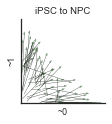

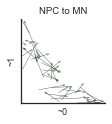

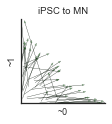

In [24]:
transitions = study.phenotype_transitions + [('iPSC', 'MN')]

for phenotype1, phenotype2 in transitions:
    fig, ax = plt.subplots(figsize=(1.5, 1.5))

    for event in ipsc_lower_triangle_in_mn_waypoints.index:
        try:
            x1, y1 = study.supplemental.waypoints.loc[(phenotype1, event)]
            x2, y2 = study.supplemental.waypoints.loc[(phenotype2, event)]
            if np.isnan(x2):
                pass
        #         ax.scatter(x1, y1, color=study.phenotype_to_color['iPSC'], linewidth=0.5, edgecolor='k', zorder=1, s=50)
            else:
                dx = x2 - x1
                dy = y2 - y1
                ax.arrow(x1, y1, dx, dy, facecolor='darkgreen', alpha=0.5)
        except KeyError:
            pass
    ax.set(xlim=(0, 1), ylim=(0, 1), xlabel='~0', ylabel='~1', xticks=[], yticks=[], 
           title='{} to {}'.format(phenotype1, phenotype2))
    sns.despine()
#     fig.tight_layout()
    fig.savefig('{}/waypoints_lower_triangle_in_{}_to_{}_arrows.pdf'.format(waypoint_folder, phenotype1, phenotype2))

In [25]:
study.splicing.feature_expression_id_col = 'ensembl_id'

## Stacked violinplots of the events

In [26]:
foreground_events = ipsc_lower_triangle_in_mn_waypoints.index

In [27]:
singles = study.splicing.singles
print singles.shape
not_outliers = study.sample_subset_to_sample_ids('~outlier')
singles = singles.loc[not_outliers].dropna(thresh=20, axis=1)
print singles.shape

(196, 11558)
(201, 11128)


In [28]:
foreground_psi = singles[foreground_events]
foreground_psi.shape

(201, 63)

In [29]:
foreground_psi_tidy = foreground_psi.unstack()
foreground_psi_tidy = foreground_psi_tidy.reset_index()
foreground_psi_tidy = foreground_psi_tidy.rename(
    columns={'level_0': 'event_id', 'level_1': 'sample_id', 0:'$\Psi$'})
foreground_psi_tidy = foreground_psi_tidy.join(study.sample_id_to_phenotype, on='sample_id')
foreground_psi_tidy.head()

,event_id,sample_id,$\Psi$,phenotype
0,exon:chr10:105156166-105156223:-@exon:chr10:10...,CVN_01,0,NPC
1,exon:chr10:105156166-105156223:-@exon:chr10:10...,CVN_02,0,NPC
2,exon:chr10:105156166-105156223:-@exon:chr10:10...,CVN_03,0,NPC
3,exon:chr10:105156166-105156223:-@exon:chr10:10...,CVN_04,0,NPC
4,exon:chr10:105156166-105156223:-@exon:chr10:10...,CVN_05,0,NPC


In [30]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes'

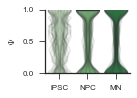

In [31]:
fig, ax = plt.subplots(figsize=(2, 1.5))

for event, df in foreground_psi_tidy.groupby('event_id'):
    sns.violinplot(x='phenotype', y='$\Psi$', data=df, order=study.phenotype_order, 
                   palette=study.phenotype_color_ordered, bw=0.2, inner=None)
ax.set(ylim=(0, 1), yticks=[0, 0.5, 1], xlabel='');
for collection in ax.collections:
    collection.set_alpha(0.1)
sns.despine()
fig.tight_layout()
fig.savefig('{}/stacked_violinplot.pdf'.format(figure_folder))

## Gene ontology enrichment

In [32]:
foreground = study.splicing.splicing_to_expression_id(ipsc_lower_triangle_in_mn_waypoints.index)


In [33]:
study.supplemental.waypoints.head()

0  \
phenotype event_id                                                           
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  2.220446e-16   
          exon:chr10:102286732-102286831:-@exon:chr10:102...  2.220446e-16   
          exon:chr10:103360960-103361093:+@exon:chr10:103...  9.499998e-01   
          exon:chr10:103563492-103563776:-@exon:chr10:103...  4.545454e-02   
          exon:chr10:103567487-103567658:-@exon:chr10:103...  2.220446e-16   

                                                                     1  
phenotype event_id                                                      
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  1.000000  
          exon:chr10:102286732-102286831:-@exon:chr10:102...  1.000000  
          exon:chr10:103360960-103361093:+@exon:chr10:103...  0.050000  
          exon:chr10:103563492-103563776:-@exon:chr10:103...  0.954545  
          exon:chr10:103567487-103567658:-@exon:chr10:103...  1.000000

In [34]:
background_waypoints = study.supplemental.waypoints.loc[['MN', 'iPSC']]
print background_waypoints.shape
background_waypoints.head()

(10021, 2)


0  \
phenotype event_id                                                           
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  2.220446e-16   
          exon:chr10:102286732-102286831:-@exon:chr10:102...  2.220446e-16   
          exon:chr10:103360960-103361093:+@exon:chr10:103...  9.499998e-01   
          exon:chr10:103563492-103563776:-@exon:chr10:103...  4.545454e-02   
          exon:chr10:103567487-103567658:-@exon:chr10:103...  2.220446e-16   

                                                                     1  
phenotype event_id                                                      
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  1.000000  
          exon:chr10:102286732-102286831:-@exon:chr10:102...  1.000000  
          exon:chr10:103360960-103361093:+@exon:chr10:103...  0.050000  
          exon:chr10:103563492-103563776:-@exon:chr10:103...  0.954545  
          exon:chr10:103567487-103567658:-@exon:chr10:103...  1.000000

In [35]:
background_waypoints = background_waypoints.groupby(level=1).filter(lambda x: len(x) == 2)
print background_waypoints.shape
background_waypoints.head()

(4484, 2)


0  \
phenotype event_id                                                           
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  2.220446e-16   
          exon:chr10:102286732-102286831:-@exon:chr10:102...  2.220446e-16   
          exon:chr10:103360960-103361093:+@exon:chr10:103...  9.499998e-01   
          exon:chr10:103563492-103563776:-@exon:chr10:103...  4.545454e-02   
          exon:chr10:103567487-103567658:-@exon:chr10:103...  2.220446e-16   

                                                                     1  
phenotype event_id                                                      
MN        exon:chr10:102114184-102114389:+@exon:chr10:102...  1.000000  
          exon:chr10:102286732-102286831:-@exon:chr10:102...  1.000000  
          exon:chr10:103360960-103361093:+@exon:chr10:103...  0.050000  
          exon:chr10:103563492-103563776:-@exon:chr10:103...  0.954545  
          exon:chr10:103567487-103567658:-@exon:chr10:103...  1.000000

In [36]:
background_events = background_waypoints.index.levels[1]
background_events

Index([u'exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-',
       u'exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-',
       u'exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+',
       u'exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-',
       u'exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-',
       u'exon:chr10:102013178-102013296:-@exon:chr10:102010005-102010089:-@exon:chr10:102006552-102006692:-',
       u'exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-@exon:chr10:102013178-102013296:-',
       u'exon:chr10:102020723-102020801:-@exon:chr10:102019975-102020076:-@exon:chr10:102016019-102016233:-',
       u'exon:chr10:102114184-102114389:+@exon:chr10:102116289-102116521:+@exon:chr10:102120491-102124591:+',
       u'e

In [37]:
background = study.splicing.splicing_to_expression_id(background_events)

In [38]:
go_enrichment = study.go_enrichment(foreground, background=background, min_feature_size=5, min_background_size=20, 
                                    domain='biological_process')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/data_model/gene_ontology.py:168: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  enrichment_df = enrichment_df.sort(columns=['p_value'])


In [39]:
go_enrichment.shape

(7, 9)

In [40]:
go_enrichment.loc[go_enrichment.features_of_interest_in_go_term_gene_symbols.str.contains('RPS24')]

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0010467,"ENSG00000115875,ENSG00000138326,ENSG0000019711...","SRSF7,RPS24,PCBP2,HNRNPR,RBPJ,EIF4A2,HNRNPD,RN...",biological_process,gene expression,350,10,771,0.000051,0.000359


In [41]:
go_enrichment.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0008380,"ENSG00000131051,ENSG00000173933,ENSG0000011587...","RBM39,RBM4,SRSF7,RBM14-RBM4,PCBP2,HNRNPR,HNRNP...",biological_process,RNA splicing,138,10,268,4.909383e-09,3.436568e-08
GO:0000398,"ENSG00000115875,ENSG00000197111,ENSG0000012594...","SRSF7,PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HN...",biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06
GO:0006396,"ENSG00000173933,ENSG00000131051,ENSG0000024864...","RBM4,RBM39,RBM14-RBM4,HNRNPD,SYNCRIP",biological_process,RNA processing,46,5,97,1.058494e-06,7.409455e-06
GO:0006397,"ENSG00000131051,ENSG00000173933,ENSG0000011587...","RBM39,RBM4,SRSF7,RBM14-RBM4,HNRNPR,HNRNPA2B1",biological_process,mRNA processing,94,6,240,5.979649e-06,4.185754e-05
GO:0010467,"ENSG00000115875,ENSG00000138326,ENSG0000019711...","SRSF7,RPS24,PCBP2,HNRNPR,RBPJ,EIF4A2,HNRNPD,RN...",biological_process,gene expression,350,10,771,5.126691e-05,3.588684e-04


In [42]:
go_enrichment.head(10)['features_of_interest_in_go_term_gene_symbols'].values

array([ 'RBM39,RBM4,SRSF7,RBM14-RBM4,PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HNRNPC',
       'SRSF7,PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HNRNPC',
       'RBM4,RBM39,RBM14-RBM4,HNRNPD,SYNCRIP',
       'RBM39,RBM4,SRSF7,RBM14-RBM4,HNRNPR,HNRNPA2B1',
       'SRSF7,RPS24,PCBP2,HNRNPR,RBPJ,EIF4A2,HNRNPD,RNMT,HNRNPA2B1,HNRNPC',
       'ZNF207,RBM39,TCEAL8,PFDN5,RBPJ,HNRNPD',
       'FDPS,DGUOK,GGCT,AASS,GNAS,HMGCS1,ADSL'], dtype=object)

In [43]:
go_enrichment.to_csv('{}/gene_ontology_enrichment.csv'.format(figure_folder))

In [44]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

In [45]:
go_folder = '{}/go_enrichment'.format(figure_folder)
!mkdir $go_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes/go_enrichment': File exists


/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/visualize/gene_ontology.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data = data.sort(x_col, ascending=True)


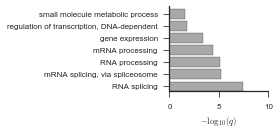

In [46]:
fig, ax = plt.subplots(figsize=(4, 2))
plot_go_enrichment(data=go_enrichment, color='darkgrey')
ax.locator_params('x', nbins=3)
fig.tight_layout()
fig.savefig('{}/waypoints_lower_triangle_in_ipsc_to_mn_go_enrichment.pdf'.format(go_folder))

In [47]:
go_enrichment_no_cellular_component = go_enrichment.loc[go_enrichment.go_domain != 'cellular_component']
go_enrichment_no_cellular_component.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0008380,"ENSG00000131051,ENSG00000173933,ENSG0000011587...","RBM39,RBM4,SRSF7,RBM14-RBM4,PCBP2,HNRNPR,HNRNP...",biological_process,RNA splicing,138,10,268,4.909383e-09,3.436568e-08
GO:0000398,"ENSG00000115875,ENSG00000197111,ENSG0000012594...","SRSF7,PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HN...",biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06
GO:0006396,"ENSG00000173933,ENSG00000131051,ENSG0000024864...","RBM4,RBM39,RBM14-RBM4,HNRNPD,SYNCRIP",biological_process,RNA processing,46,5,97,1.058494e-06,7.409455e-06
GO:0006397,"ENSG00000131051,ENSG00000173933,ENSG0000011587...","RBM39,RBM4,SRSF7,RBM14-RBM4,HNRNPR,HNRNPA2B1",biological_process,mRNA processing,94,6,240,5.979649e-06,4.185754e-05
GO:0010467,"ENSG00000115875,ENSG00000138326,ENSG0000019711...","SRSF7,RPS24,PCBP2,HNRNPR,RBPJ,EIF4A2,HNRNPD,RN...",biological_process,gene expression,350,10,771,5.126691e-05,3.588684e-04


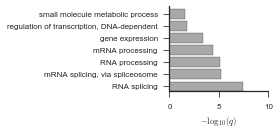

In [48]:
fig, ax = plt.subplots(figsize=(4, 2))
plot_go_enrichment(data=go_enrichment_no_cellular_component, color='darkgrey')
ax.locator_params('x', nbins=3)
fig.tight_layout()
fig.savefig('{}/waypoints_lower_triangle_in_ipsc_to_mn_go_enrichment_no_cellular_component.pdf'.format(go_folder))

In [49]:
go_id_to_gene_symbol = go_enrichment.features_of_interest_in_go_term_gene_symbols.str.split(',').apply(pd.Series).unstack()
go_id_to_gene_symbol.index = go_id_to_gene_symbol.index.droplevel(0)
go_id_to_gene_symbol = go_id_to_gene_symbol.dropna()
go_id_to_gene_symbol.name = 'gene_name'
go_id_to_gene_symbol
# go_id_to_gene_symbol = go_id_to_gene_symbol

GO:0008380         RBM39
GO:0000398         SRSF7
GO:0006396          RBM4
GO:0006397         RBM39
GO:0010467         SRSF7
GO:0006355        ZNF207
GO:0044281          FDPS
GO:0008380          RBM4
GO:0000398         PCBP2
GO:0006396         RBM39
GO:0006397          RBM4
GO:0010467         RPS24
GO:0006355         RBM39
GO:0044281         DGUOK
GO:0008380         SRSF7
GO:0000398        HNRNPR
GO:0006396    RBM14-RBM4
GO:0006397         SRSF7
GO:0010467         PCBP2
GO:0006355        TCEAL8
GO:0044281          GGCT
GO:0008380    RBM14-RBM4
GO:0000398        HNRNPD
GO:0006396        HNRNPD
GO:0006397    RBM14-RBM4
GO:0010467        HNRNPR
GO:0006355         PFDN5
GO:0044281          AASS
GO:0008380         PCBP2
GO:0000398       SYNCRIP
GO:0006396       SYNCRIP
GO:0006397        HNRNPR
GO:0010467          RBPJ
GO:0006355          RBPJ
GO:0044281          GNAS
GO:0008380        HNRNPR
GO:0000398     HNRNPA2B1
GO:0006397     HNRNPA2B1
GO:0010467        EIF4A2
GO:0006355        HNRNPD


In [50]:
go_enrichment_with_events = go_enrichment.join(go_id_to_gene_symbol)
go_enrichment_with_events = go_enrichment_with_events.drop(['features_of_interest_in_go_term_gene_symbols', 'features_of_interest_in_go_term'], axis=1)
print go_enrichment_with_events.shape
go_enrichment_with_events.head()

(51, 8)


,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value,gene_name
GO:0000398,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,0.000006,SRSF7
GO:0000398,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,0.000006,PCBP2
GO:0000398,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,0.000006,HNRNPR
GO:0000398,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,0.000006,HNRNPD
GO:0000398,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,0.000006,SYNCRIP


In [51]:
foreground_events = ipsc_lower_triangle_in_mn_waypoints.index

In [52]:
foreground_events_gene_names = study.splicing.feature_data['gene_name'][foreground_events]
foreground_events_gene_names = foreground_events_gene_names.reset_index()
foreground_events_gene_names.head()

,event_id,gene_name
0,exon:chr10:105156166-105156223:-@exon:chr10:10...,USMG5
1,exon:chr10:79796952-79797062:+@exon:chr10:7979...,RPS24
2,exon:chr11:111957364-111957446:-@exon:chr11:11...,TIMM8B
3,exon:chr11:134119061-134119156:-@exon:chr11:13...,THYN1
4,exon:chr11:66407171-66407594:+@exon:chr11:6641...,"RBM14-RBM4,RBM4"


In [53]:
go_enrichment_with_events = go_enrichment_with_events.merge(foreground_events_gene_names, left_on='gene_name', right_on='gene_name')
go_enrichment_with_events.head()

,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value,gene_name,event_id
0,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...
1,biological_process,mRNA processing,94,6,240,5.979649e-06,4.185754e-05,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...
2,biological_process,RNA splicing,138,10,268,4.909383e-09,3.436568e-08,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...
3,biological_process,gene expression,350,10,771,5.126691e-05,3.588684e-04,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...
4,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06,PCBP2,exon:chr12:53861005-53861077:+@exon:chr12:5386...


In [54]:
go_enrichment_with_events = go_enrichment_with_events.join(study.splicing.feature_data.ensembl_id, on='event_id')
go_enrichment_with_events.head()

,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value,gene_name,event_id,ensembl_id
0,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...,ENSG00000115875
1,biological_process,mRNA processing,94,6,240,5.979649e-06,4.185754e-05,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...,ENSG00000115875
2,biological_process,RNA splicing,138,10,268,4.909383e-09,3.436568e-08,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...,ENSG00000115875
3,biological_process,gene expression,350,10,771,5.126691e-05,3.588684e-04,SRSF7,exon:chr2:38973836-38973889:-@exon:chr2:389732...,ENSG00000115875
4,biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06,PCBP2,exon:chr12:53861005-53861077:+@exon:chr12:5386...,ENSG00000197111


In [55]:
go_enrichment_with_events.to_csv('{}/gene_ontology_enrichment_with_events.csv'.format(go_folder))

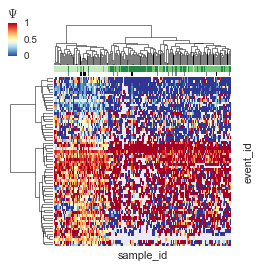

In [56]:
sns.set(style='darkgrid')
data = study.splicing.data.loc[:, foreground_events]
mask = data.isnull()
data = data.fillna(0.5)

sample_colors = study.sample_id_to_color[data.index]
pooled_outlier = ['black' if x in study.pooled else 'grey' if x in 
                  study.expression.outlier_samples else 'white' for x in data.index]
row_colors = [sample_colors, pooled_outlier]

xticklabels = study.splicing.feature_data['gene_name'][data.columns]

g = sns.clustermap(data.T, mask=mask.T, cmap='RdYlBu_r', center=0.5, col_colors=row_colors, method='ward', figsize=(4, 4))
g.ax_heatmap.set(yticklabels=[], xticks=[])
g.ax_col_colors.set(xticks=[], yticks=[]);
g.cax.yaxis.set_ticks([0, 0.5, 1])
g.cax.yaxis.set_ticklabels([0, 0.5, 1])
g.cax.set_title('$\Psi$')
# g.savefig('{}/multimodal_to_extremes_psi_clustermap.pdf'.format(clustering_folder))

In [57]:
go_enrichment_with_events_rna = go_enrichment_with_events.loc[go_enrichment_with_events.go_name.str.contains('RNA') |
                                                              go_enrichment_with_events.go_name.str.contains('gene')]
print go_enrichment_with_events_rna.shape

(38, 10)


In [58]:
go_enrichment_with_events_rna.to_csv('{}/gene_ontology_enrichment_with_events_rbp_only.csv'.format(go_folder))

In [59]:
# go_enrichment_with_events_rna.head

In [60]:
sns.set(context='talk')

In [61]:
clustering_folder = '{}/clustering'.format(figure_folder)
! mkdir $clustering_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes/clustering': File exists


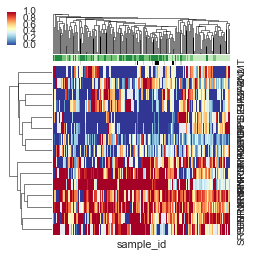

In [62]:
sns.set(style='darkgrid')
data = study.splicing.data.loc[:, go_enrichment_with_events_rna.event_id.unique()]
mask = data.isnull()
data = data.fillna(0.5)

sample_colors = study.sample_id_to_color[data.index]
pooled_outlier = ['black' if x in study.pooled else 'lightgrey' if x in 
                  study.expression.outlier_samples else 'white' for x in data.index]
row_colors = [sample_colors, pooled_outlier]

xticklabels = study.splicing.feature_data['gene_name'][data.columns]

g = sns.clustermap(data.T, mask=mask.T, cmap='RdYlBu_r', center=0.5, col_colors=row_colors, figsize=(4, 4))
g.ax_heatmap.set(yticklabels=xticklabels, xticks=[])
g.ax_col_colors.set(xticks=[], yticks=[]);
g.savefig('{}/multimodal_to_extremes_psi_clustermap_rbps.pdf'.format(clustering_folder))

In [63]:
sns.set(style='ticks')

In [64]:
figure_folder

'/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes'

In [65]:
plot_go_enrichment??

In [66]:
pd.options.display.max_colwidth = 500

In [67]:
go_enrichment_rna = go_enrichment.loc[go_enrichment.go_name.str.contains('RNA')]
go_enrichment_rna

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0008380,"ENSG00000131051,ENSG00000173933,ENSG00000115875,ENSG00000248643,ENSG00000197111,ENSG00000125944,ENSG00000138668,ENSG00000135316,ENSG00000122566,ENSG00000092199","RBM39,RBM4,SRSF7,RBM14-RBM4,PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HNRNPC",biological_process,RNA splicing,138,10,268,4.909383e-09,3.436568e-08
GO:0000398,"ENSG00000115875,ENSG00000197111,ENSG00000125944,ENSG00000138668,ENSG00000135316,ENSG00000122566,ENSG00000092199","SRSF7,PCBP2,HNRNPR,HNRNPD,SYNCRIP,HNRNPA2B1,HNRNPC",biological_process,"mRNA splicing, via spliceosome",103,7,196,8.891601e-07,6.224120e-06
GO:0006396,"ENSG00000173933,ENSG00000131051,ENSG00000248643,ENSG00000138668,ENSG00000135316","RBM4,RBM39,RBM14-RBM4,HNRNPD,SYNCRIP",biological_process,RNA processing,46,5,97,1.058494e-06,7.409455e-06
GO:0006397,"ENSG00000131051,ENSG00000173933,ENSG00000115875,ENSG00000248643,ENSG00000125944,ENSG00000122566","RBM39,RBM4,SRSF7,RBM14-RBM4,HNRNPR,HNRNPA2B1",biological_process,mRNA processing,94,6,240,5.979649e-06,4.185754e-05


In [68]:
# violinplot_folder = '{}/violinplots'.format(figure_folder)
# ! mkdir $violinplot_folder

# for event in foreground_events:
# #     gene_name = study.splicing.feature_data['gene_name'][event]
# #     study.plot_event(event, sample_subset='~outlier')
# #     fig = plt.gcf()
# #     fig.savefig('{}/{}_{}.pdf'.format(violinplot_folder, gene_name, event))

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes/violinplots': File exists


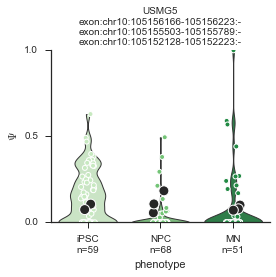

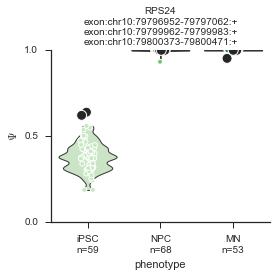

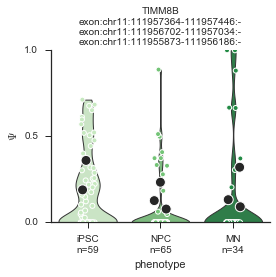

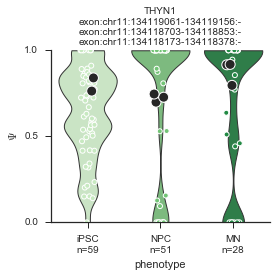

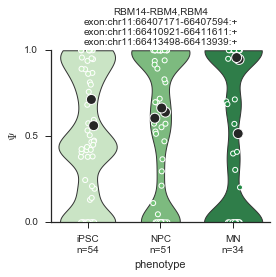

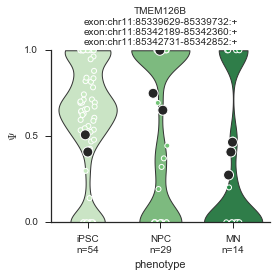

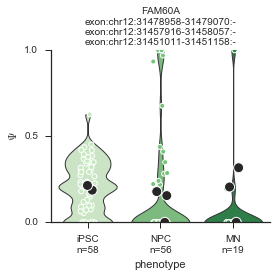

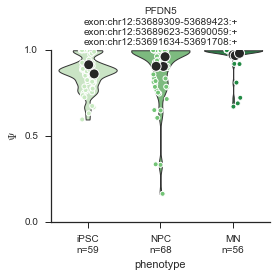

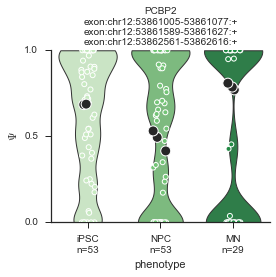

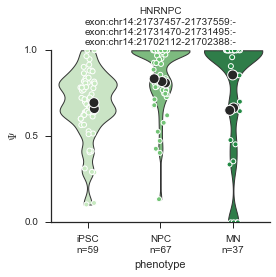

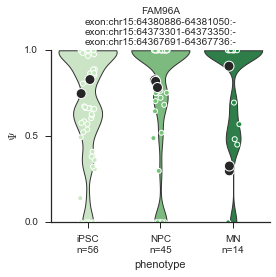

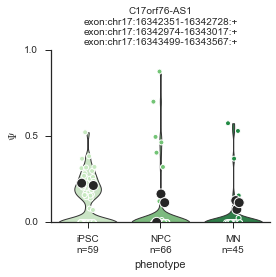

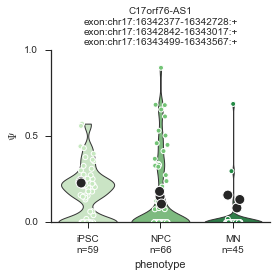

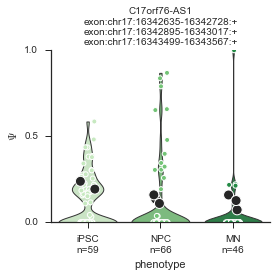

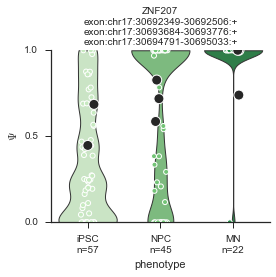

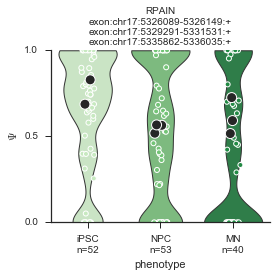

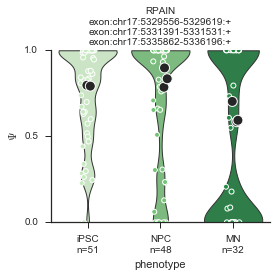

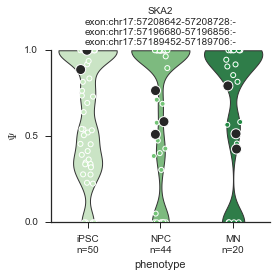

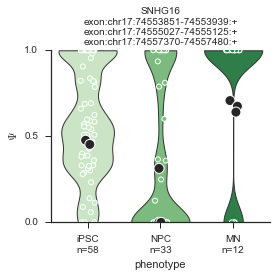

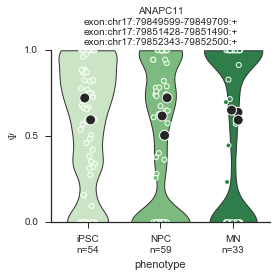

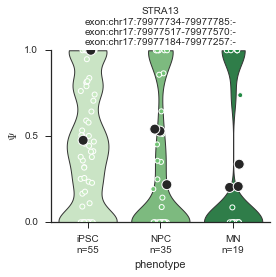

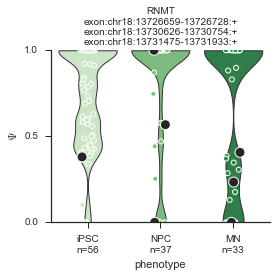

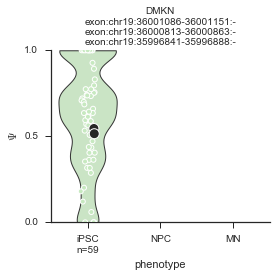

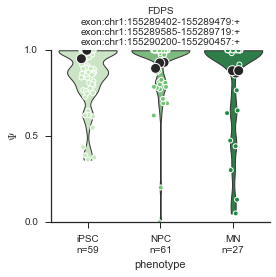

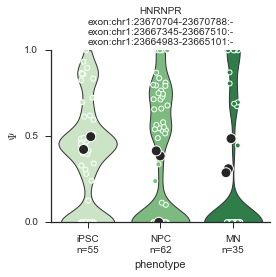

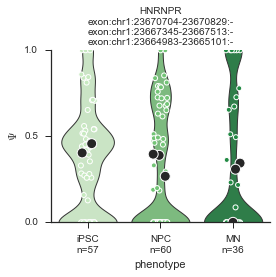

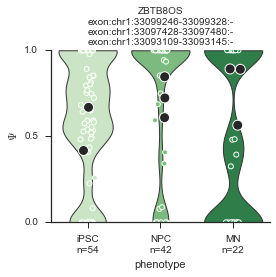

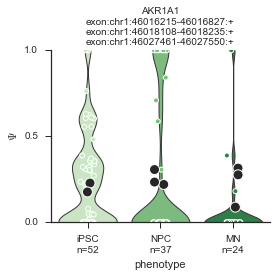

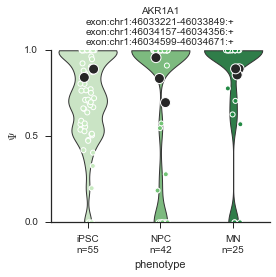

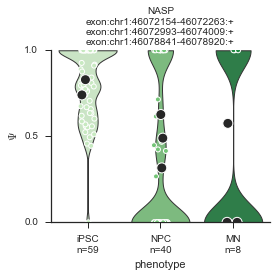

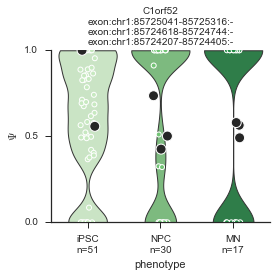

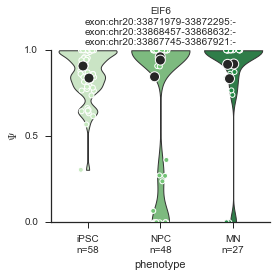

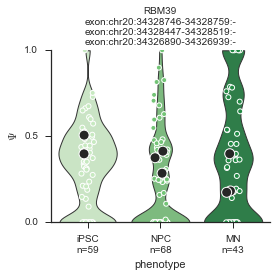

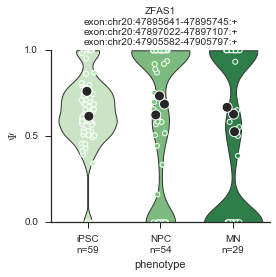

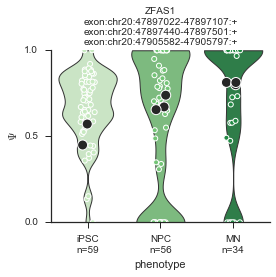

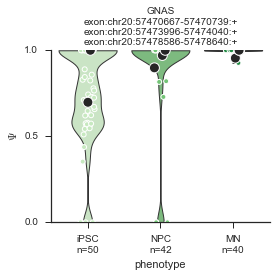

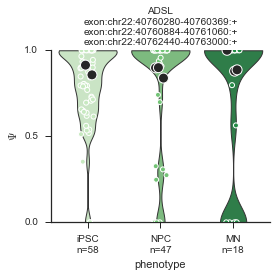

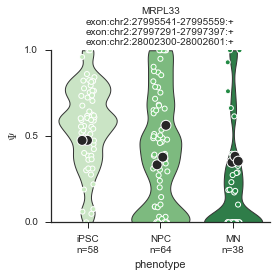

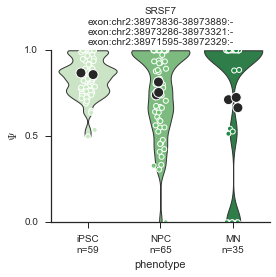

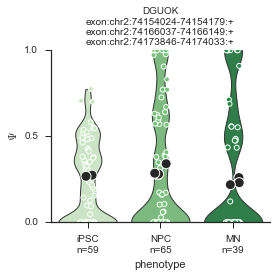

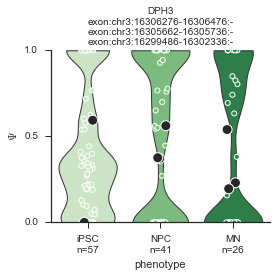

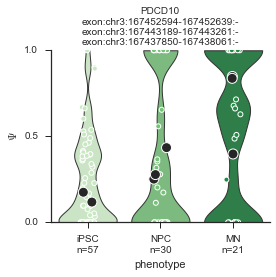

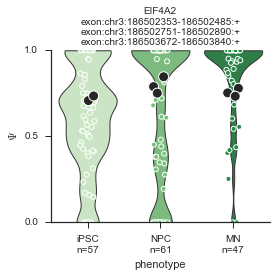

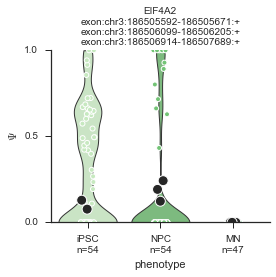

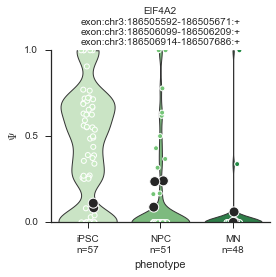

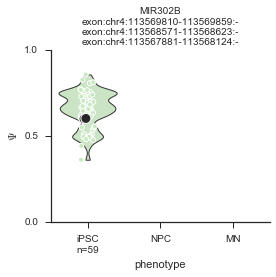

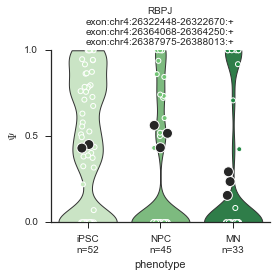

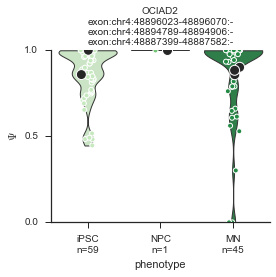

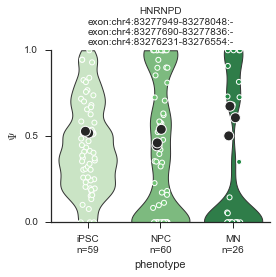

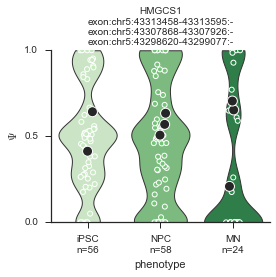

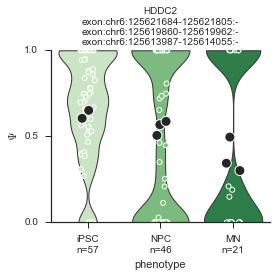

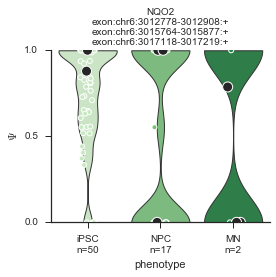

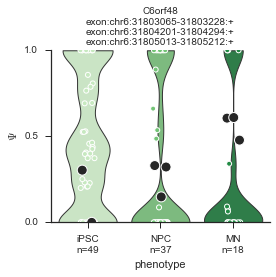

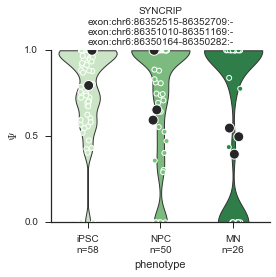

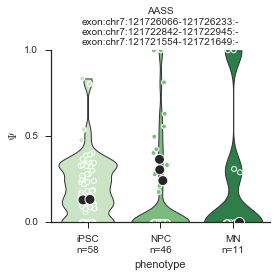

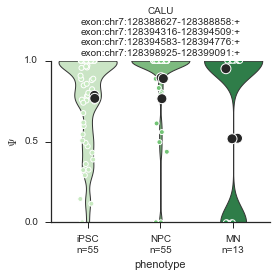

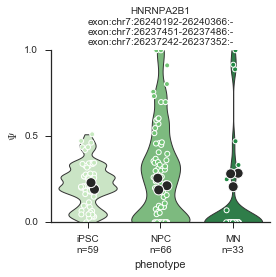

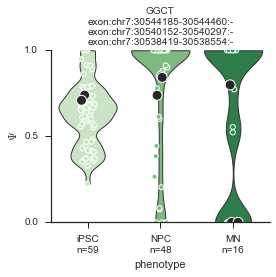

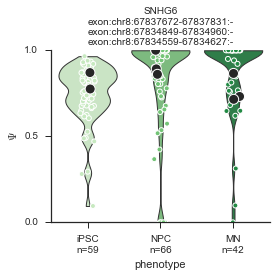

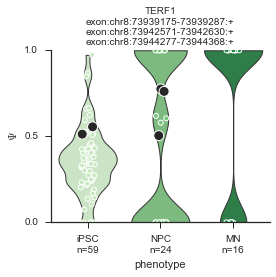

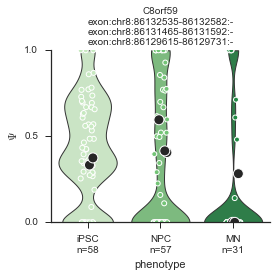

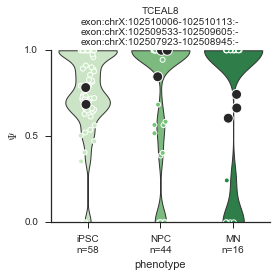

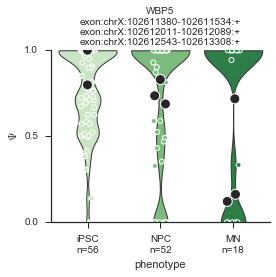

In [69]:
violinplot_folder = '{}/violinplots'.format(figure_folder)
! mkdir $violinplot_folder

for event in ipsc_lower_triangle_in_mn_waypoints.index:
    gene_name = study.splicing.feature_data['gene_name'][event]
    study.plot_event(event, sample_subset='~outlier')
    fig = plt.gcf()
    fig.savefig('{}/{}_{}.pdf'.format(violinplot_folder, gene_name, event))

In [70]:
from astrolabe.visualize import voyageplot

In [71]:
voyageplot?

In [72]:
waypoints_index = study.supplemental.waypoints.swaplevel(0, 1)
waypoints_index = waypoints_index.sort_index()
waypoints_index.head()

,,0,1
event_id,phenotype,,
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,iPSC,2.220446e-16,0.965517
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,iPSC,2.220446e-16,0.870968
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,iPSC,1.282051e-01,0.589744
exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,iPSC,1.110223e-16,0.966667
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,iPSC,2.220446e-16,1.000000


In [73]:
waypoints_index = waypoints_index.rename(columns={'0':'pc_1', '1':'pc_2'})
waypoints_index.head()

,,pc_1,pc_2
event_id,phenotype,,
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,iPSC,2.220446e-16,0.965517
exon:chr10:101480744-101480825:-@exon:chr10:101478103-101478257:-@exon:chr10:101476105-101476218:-,iPSC,2.220446e-16,0.870968
exon:chr10:101507014-101507147:+@exon:chr10:101510126-101510153:+@exon:chr10:101514286-101514391:+,iPSC,1.282051e-01,0.589744
exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-@exon:chr10:101995424-101995521:-,iPSC,1.110223e-16,0.966667
exon:chr10:102003455-102003534:-@exon:chr10:101997779-101997988:-@exon:chr10:101996607-101996726:-,iPSC,2.220446e-16,1.000000


mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/from_multimodal_to_extremes/voyageplots': File exists


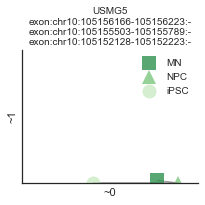

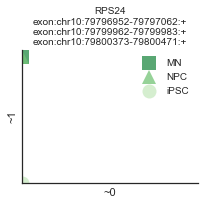

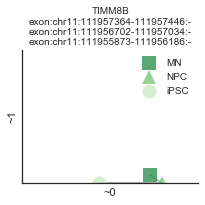

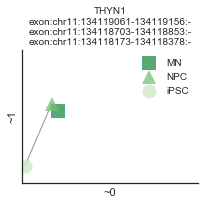

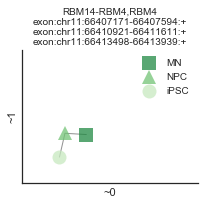

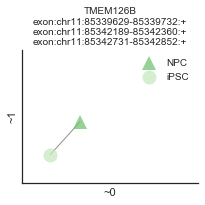

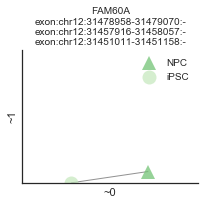

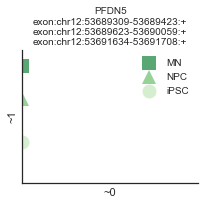

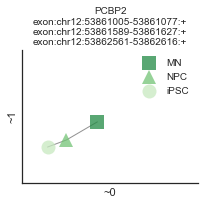

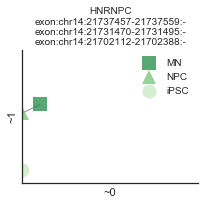

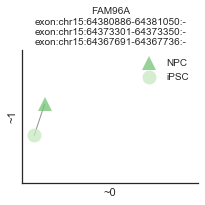

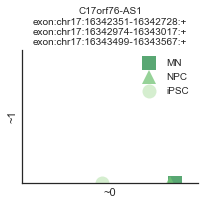

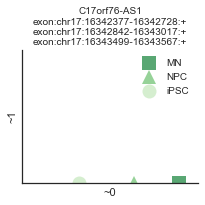

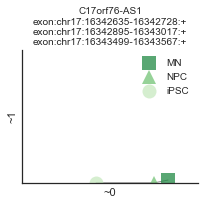

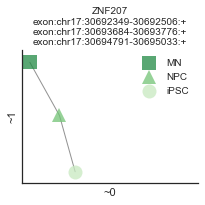

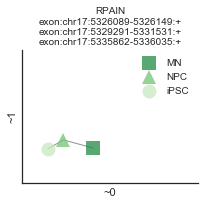

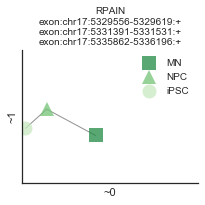

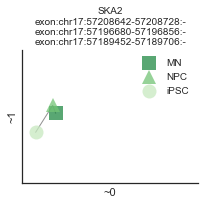

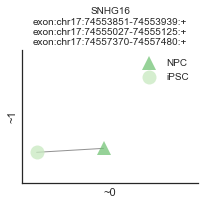

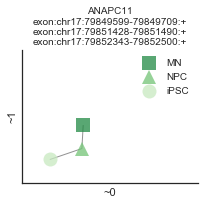

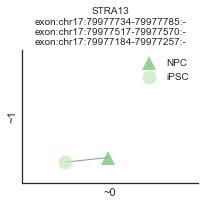

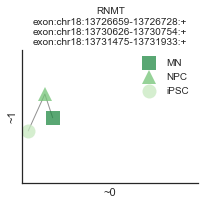

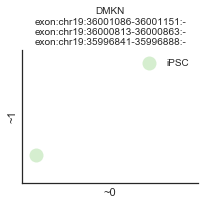

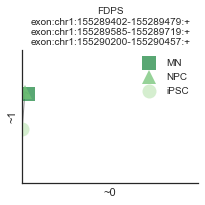

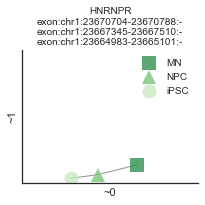

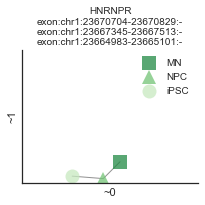

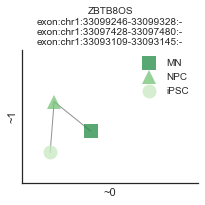

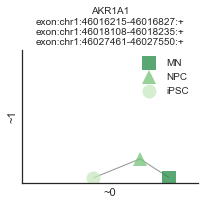

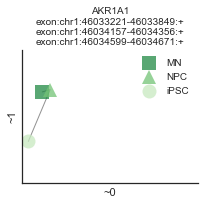

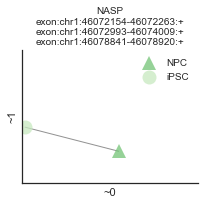

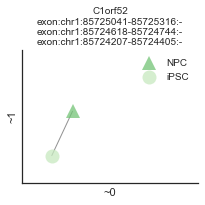

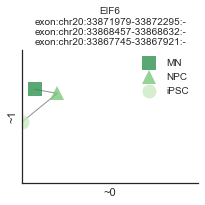

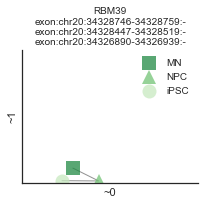

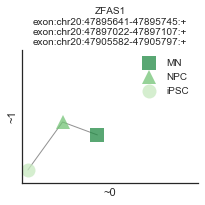

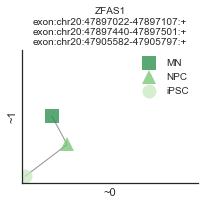

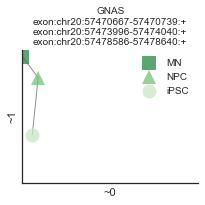

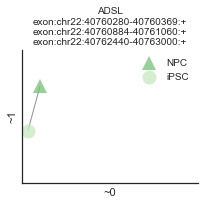

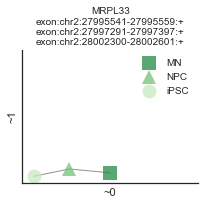

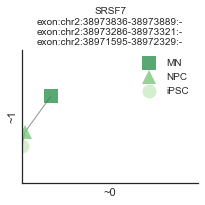

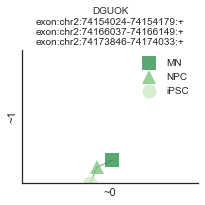

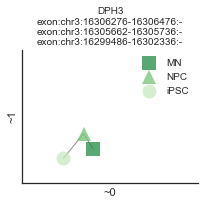

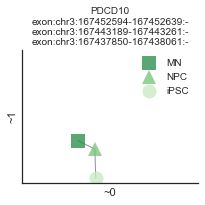

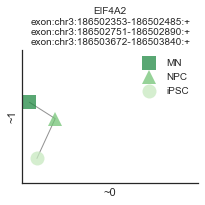

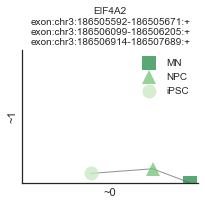

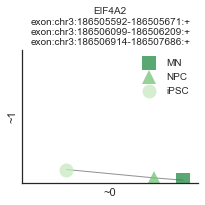

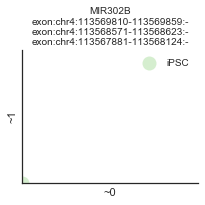

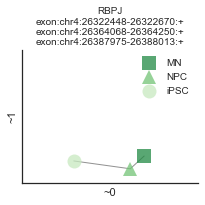

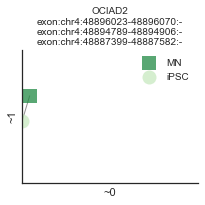

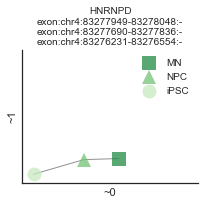

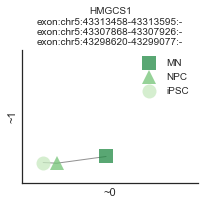

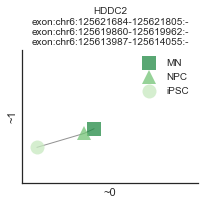

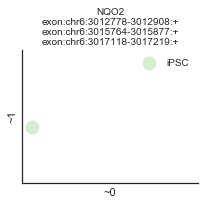

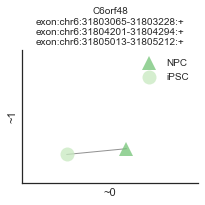

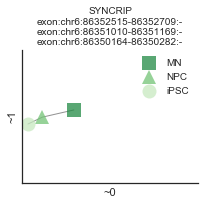

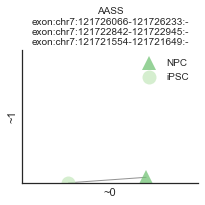

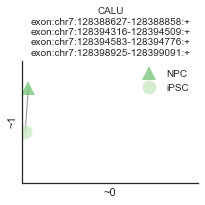

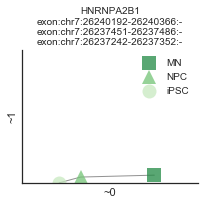

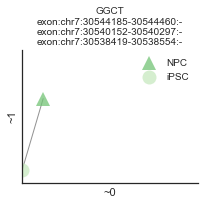

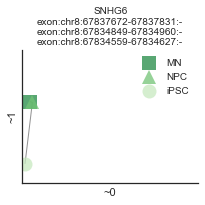

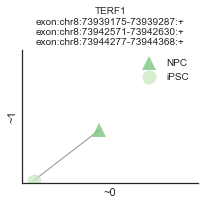

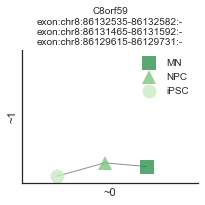

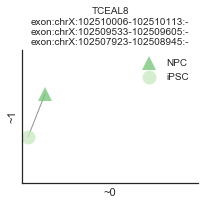

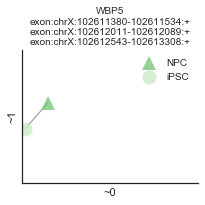

In [74]:
voyageplot_folder = '{}/voyageplots'.format(figure_folder)
! mkdir $voyageplot_folder

for event in ipsc_lower_triangle_in_mn_waypoints.index:
    gene_name = study.splicing.feature_data['gene_name'][event]
    fig, ax = plt.subplots(figsize=(3, 3))
    voyageplot(waypoints_index, event, study.phenotype_to_color, study.phenotype_to_marker, 
               study.phenotype_order, ax=ax, xlabel='~0', ylabel='~1')
#     fig = plt.gcf() 
    sns.despine()
    title = '{}\n{}'.format(gene_name, '\n'.join(event.split('@')))
    ax.set_title(title, fontsize=10)
    fig.tight_layout()
    fig.savefig('{}/{}_{}.pdf'.format(voyageplot_folder, gene_name, event))

In [75]:
study.splicing.feature_data.exon2_splice_site_3p_seq[ipsc_lower_triangle_in_mn_waypoints.index]

AttributeError: 'DataFrame' object has no attribute 'exon2_splice_site_3p_seq'

## Get motifs

In [ ]:
bed_folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms/figure4_voyages/multimodal_to_extremes'
! mkdir -p $bed_folder

In [ ]:
foreground_events = ipsc_lower_triangle_in_mn_waypoints.index

In [ ]:
background_events

In [ ]:
bed_folder

In [ ]:

homer_dir = '{}/homer'.format(bed_folder)
!mkdir -p $homer_dir


In [ ]:
rm -rf $homer_dir/*

In [ ]:
import os
import pyhomer

DIRECTIONS = 'upstream', 'downstream'


import pybedtools

DIR = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

exon_bedfile = '{}/exon2.bed'.format(DIR)
exon_bed = pybedtools.BedTool(exon_bedfile)

commands = []

findMotifsGenome = '/home/yeo-lab/software/homer/bin/findMotifsGenome.pl'
n_processors = 4
homer_flags = '-rna -len 4,5,6 -mset vertebrates -mis 0 -p {} -noweight'.format(n_processors)


primate_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPrimates.bed'
primate = pybedtools.BedTool(primate_filename)
placental_filename = '/projects/ps-yeolab/genomes/hg19/database/phastConsElements46wayPlacental.bed'
placental = pybedtools.BedTool(placental_filename)
conserved_regions = {'primate': primate, 'placental': placental}

genome = 'hg19'

nt = 400


# for phenotype, phenotype_df in study.supplemental.modalities_tidy.groupby('phenotype'):
#     background_events = set(phenotype_df.event_name)
#     for modality, modality_df in phenotype_df.groupby('modality'):
event_names = set(foreground_events)
format_args = bed_folder, 
foreground_bed = exon_bed.filter(lambda x: x.name in event_names)
foreground_filename = '{}/exon2_foreground.bed'.format(*format_args)
foreground = pybedtools.BedTool(foreground_bed.saveas(foreground_filename))

background_bed = exon_bed.filter(lambda x: x.name not in event_names and x.name in background_events)
background_filename = '{}/exon2_background.bed'.format(*format_args)
background = pybedtools.BedTool(background_bed.saveas(background_filename))

pair = pyhomer.ForegroundBackgroundPair(foreground, background)
print '\n', pair 

suffix = os.path.basename(pair.foreground.fn).replace('_foreground.bed', '')
out_dir = '{base_dir}/{suffix}'.format(base_dir=homer_dir, suffix=suffix)
#         command = pair.homer(homer_flags, findMotifsGenome, out_dir=out_dir)
#         commands.append(command)

beds = {'background': background_bed, 'foreground': foreground_bed}

for clade, conservation_bed in conserved_regions.items():
    conserved_pair = pair.intersect(conservation_bed, clade)
    print '\n', conserved_pair
    suffix = os.path.basename(conserved_pair.foreground.fn).replace('_foreground.bed', '')
    out_dir = '{base_dir}/{suffix}'.format(base_dir=homer_dir, suffix=suffix)
    try:
        command = conserved_pair.homer(homer_flags, findMotifsGenome, out_dir=out_dir)
        commands.append(command)
    except ValueError:
        continue

for direction in DIRECTIONS:
    intron_pair = pair.flanking_intron(direction, 'hg19', 400)
    print '\n', intron_pair
    suffix = os.path.basename(intron_pair.foreground.fn).replace('_foreground.bed', '')
    out_dir = '{base_dir}/{suffix}'.format(base_dir=homer_dir, suffix=suffix)
#             command = pair.homer(homer_flags, findMotifsGenome, out_dir=out_dir)
#             commands.append(command)

    for clade, conservation_bed in conserved_regions.items():
        conserved_introns = intron_pair.intersect(conservation_bed, clade)
        print '\n', conserved_introns
        suffix = os.path.basename(conserved_introns.foreground.fn).replace('_foreground.bed', '')
        out_dir = '{base_dir}/{suffix}'.format(base_dir=homer_dir, suffix=suffix)
        try:
            command = conserved_introns.homer(homer_flags, findMotifsGenome, out_dir=out_dir)
            commands.append(command)
        except ValueError:
            continue

In [ ]:
from gscripts.qtools import Submitter

In [ ]:
cd $homer_dir

In [ ]:
sub = Submitter(commands, 'homer', queue='home-yeo', nodes=1, ppn=4, array=True, write_and_submit=True)

In [ ]:
ls $homer_dir

In [ ]:
from Bio import motifs

splice_site_motifs_figures = '{}/from_multimodal_to_extremes/splice_site_motifs'.format(folder)
!mkdir $splice_site_motifs_figures

cols = 'exon2_splice_site_3p_seq', 'exon2_splice_site_5p_seq'

x_ground_events = {'foreground': foreground_events, 'background': background_events}

for x_ground, events in x_ground_events.items():
    for col in cols:
        instances = study.splicing.feature_data.loc[events, col]
    #         instances = instances.str.replace('T', 'U')
        splice_site_motifs = motifs.create(instances,)
        filename = '{}/{}_{}.pdf'.format(splice_site_motifs_figures, col, x_ground)
        splice_site_motifs.weblogo(filename, format='PDF', color_scheme='color_classic')

In [ ]:
figure_folder

## Foreground events

In [ ]:
singles = study.splicing.singles
print singles.shape
not_outliers = study.sample_subset_to_sample_ids('~outlier')
singles = singles.loc[not_outliers].dropna(thresh=20, axis=1)
print singles.shape

In [ ]:
singles_mean = singles.mean()
singles_var = singles.var()

singles_mean.name = r'$\Psi$ mean'
singles_var.name = r'$\Psi$ variance'

g = sns.jointplot(singles_mean, singles_var, alpha=0.5)
g.ax_joint.plot()
g.savefig('{}/singles_psi_mean_vs_variance.pdf'.format(figure_folder))

In [ ]:
foreground_events_psi = singles[foreground_events]
foreground_events_psi.shape

In [ ]:
foreground_mean = foreground_events_psi.groupby(study.sample_id_to_phenotype).mean()
foreground_mean.head()

In [ ]:
foreground_mean_tidy = foreground_mean.unstack()
# foreground_mean_tidy = foreground_mean_tidy.reset_index()
# foreground_mean_tidy = foreground_mean_tidy.rename(columns={'level_0':'event_id', 0:'Mean'})
foreground_mean_tidy.name = "Mean"
foreground_mean_tidy.head()

In [ ]:
def tidy_stats(data, groupby, statistic):
    stat = eval('data.groupby(groupby).{}()'.format(statistic.lower()))
    tidy = stat.unstack()
    tidy.name = statistic
    return tidy

In [ ]:
range(3)

In [ ]:


foreground_var = foreground_events_psi.groupby(study.sample_id_to_phenotype).var()

In [ ]:
row

In [ ]:
singles_mean = singles.mean()
singles_var = singles.var()

singles_mean.name = r'$\Psi$ mean'
singles_var.name = r'$\Psi$ variance'

for phenotype, row in foreground_mean.iterrows():
    g = sns.jointplot(row, foreground_var.loc[phenotype], alpha=0.5)
    g.ax_joint.scatter(background_mean.loc[phenotype], background_var.loc[phenotype])
    g.savefig('{}/singles_psi_mean_vs_variance_multimodal_to_extremes_foreground_{}.pdf'.format(figure_folder, phenotype))

In [ ]:
foreground_var_tidy = foreground_var.unstack()
foreground_var_tidy = foreground_var_tidy.to_frame()
foreground_var_tidy = foreground_var_tidy.rename(columns={0:'Variance'})
foreground_var_tidy.head()

In [ ]:
foreground_stats_tidy = foreground_var_tidy.join(foreground_mean_tidy)
foreground_stats_tidy = foreground_stats_tidy.reset_index(level=1)
foreground_stats_tidy = foreground_stats_tidy.sort_index()
foreground_stats_tidy.head()

In [ ]:
foreground_stats_tidy.loc['exon:chr4:83277949-83278048:-@exon:chr4:83277690-83277836:-@exon:chr4:83276457-83276554:-']

In [ ]:
foreground_stats_tidy['data'] = 'Foreground'

In [ ]:
sns.factorplot(x='phenotype', order=study.phenotype_order, data=foreground_stats_tidy, y='Variance', kind='point')

In [ ]:
singles_var = singles.groupby(study.sample_id_to_phenotype).var()

In [ ]:
singles_var.sort()

In [ ]:
background_psi = singles[background_events]

background_mean = background_psi.groupby(study.sample_id_to_phenotype).mean().unstack()
background_var = background_psi.groupby(study.sample_id_to_phenotype).var().unstack()

background_var.name = 'Variance'
background_mean.name = 'Mean'

background_stats_tidy = background_var.to_frame().join(background_mean)
background_stats_tidy = background_stats_tidy.reset_index(level=1)
background_stats_tidy['data'] = 'Background'
background_stats_tidy.head()

In [ ]:
stats_tidy = pd.concat([foreground_stats_tidy, background_stats_tidy])
stats_tidy.head()

In [ ]:
stats_tidy.tail()

In [ ]:
mean_var_folder = '{}/mean_var'.format(figure_folder)
!mkdir $mean_var_folder

In [ ]:
g = sns.factorplot(x='phenotype', order=study.phenotype_order, data=stats_tidy, y='Variance', kind='box', hue='data')
g.savefig('{}/foreground_background_var.pdf'.format(mean_var_folder))

In [ ]:
g = sns.factorplot(x='phenotype', order=study.phenotype_order, data=stats_tidy, y='Mean', kind='box', hue='data')
g.savefig('{}/foreground_background_mean.pdf'.format(mean_var_folder))

### Clustering

In [ ]:
g = study.plot_clustermap(data_type='splicing', feature_subset=foreground_events, 
                          cmap='RdYlBu_r', center=0.5,)
fig = plt.gcf()
fig.savefig('{}/clustermap_foreground_events.pdf'.format(figure_folder))

In [ ]:
g = study.plot_correlations(data_type='splicing', feature_subset=foreground_events, 
                          cmap='PuOr', center=0)
fig = plt.gcf()
fig.savefig('{}/clustermap_correlation_foreground_events.pdf'.format(figure_folder))

In [ ]:
viz = study.plot_pca(data_type='splicing', feature_subset=foreground_events)
fig = plt.gcf()
fig.savefig('{}/foreground_events_pca.pdf'.format(figure_folder))

In [ ]:
g = study.plot_clustermap(data_type='splicing', feature_subset=foreground_events, 
                          cmap='RdYlBu_r', center=0.5, sample_subset='MN')
fig = plt.gcf()
fig.savefig('{}/motor_neuron_clustermap.pdf'.format(figure_folder))

### SNAP25

In [ ]:
snap25_folder = '{}/snap25'.format(figure_folder)
! mkdir $snap25_folder

In [ ]:
snap25_events = study.splicing.maybe_renamed_to_feature_id('SNAP25')
snap25_events

In [ ]:
snap25_mxe_event = u'exon:chr20:10265372-10265420:+@exon:chr20:10273530-10273647:+@exon:chr20:10273809-10273926:+@exon:chr20:10277573-10277698:+'
snap25 = study.splicing.data[snap25_mxe_event].dropna()

In [ ]:
singles, snap25 = study.splicing.singles.align(snap25, axis=0, join='inner')
snap25.shape

In [ ]:
syncrip_event = u'exon:chr6:86352515-86352709:-@exon:chr6:86351010-86351169:-@exon:chr6:86350164-86350282:-'
syncrip_event

In [ ]:
from scipy.stats import spearmanr

In [ ]:
x = study.splicing.data[syncrip_event]
y = snap25

x.name = 'SYNCRIP $\Psi$'
y.name = 'SNAP25 $\Psi$'

g = sns.jointplot(x, y, size=4, stat_func=spearmanr)
g.savefig('{}/syncrip_psi_vs_snap25_psi.pdf'.format(snap25_folder))
# g.ax_joint.set(xlabel='SYNCRIP $\Psi$', ylabel='SNAP25 $\Psi$')

In [ ]:
snap25.shape

In [ ]:
study.splicing.data.shape

In [ ]:
splicing_snap25_aligned, snap25 = study.splicing.data.align(snap25, axis=0, join='inner')
splicing_snap25_aligned.shape

In [ ]:
splicing_snap25_aligned = splicing_snap25_aligned.dropna(thresh=20, axis=1)
splicing_snap25_aligned.shape

In [ ]:
snap25_splicing_corr = splicing_snap25_aligned.apply(lambda x: x.corr(snap25, method='spearman'), axis=0)

In [ ]:
sns.distplot(snap25_splicing_corr, bins=np.linspace(-1, 1, 50))

In [ ]:
snap25_splicing_corr_filtered = snap25_splicing_corr[snap25_splicing_corr.abs() >= 0.4]
snap25_splicing_corr_filtered.shape

In [ ]:
study.plot_clustermap(sample_subset=snap25.index, 
                      feature_subset=snap25_splicing_corr_filtered.index, data_type='splicing',
                     cmap='RdYlBu_r', center=0.5)
fig = plt.gcf()
fig.savefig('{}/snap25_clustermap.pdf'.format(snap25_folder))

In [ ]:
g = study.plot_correlations(sample_subset=snap25.index, 
                      feature_subset=snap25_splicing_corr_filtered.index, data_type='splicing',
                     cmap='PuOr', center=0)
g.savefig('{}/snap25_splicing_correlations_clustermap.pdf'.format(snap25_folder))

In [ ]:
g = study.plot_correlations(sample_subset=snap25.index, 
                      feature_subset=snap25_splicing_corr_filtered.index, data_type='splicing',
                     cmap='PuOr', center=0, featurewise=True)
g.savefig('{}/snap25_splicing_correlations_clustermap_featurewise.pdf'.format(snap25_folder))

In [ ]:
study.plot_pca(data_type='splicing', sample_subset=snap25.index,
               feature_subset=snap25_splicing_corr_filtered.index, show_point_labels=True)

### EIF4A2 is NMDish in iPSC --> what replaces it?

In [ ]:
eif4a2_folder = '{}/eif4a2'.format(figure_folder)
! mkdir $eif4a2_folder

In [ ]:
study.plot_gene('EIF4A2', sample_subset='~outlier')
fig = plt.gcf()
fig.savefig('{}/EIF4A2_expression.pdf'.format(eif4a2_folder))

In [ ]:
eif4a_ensembl_ids = study.expression.feature_data.gene_name[study.expression.feature_data.gene_name.str.startswith('EIF4A')].index
eif4a_ensembl_ids.shape

In [ ]:
import itertools

for feature1, feature2 in itertools.combinations(eif4a_ensembl_ids, 2):
    try:
        g = study.plot_two_features(feature1, feature2, size=4)
        feature1_name = study.expression.feature_data['gene_name'][feature1]
        feature2_name = study.expression.feature_data['gene_name'][feature2]
#         g.ax_joint.set(xlabel=feature1_name, ylabel=feature2_name)
        fig = plt.gcf()
        ax = fig.axes[0]
        ax.set(xlabel=feature1_name, ylabel=feature2_name)
        fig.savefig('{}/jointplot_expression_{}_vs_{}_pearson.pdf'.format(eif4a2_folder, feature1_name, feature2_name))
    except ValueError:
        continue

In [ ]:
import itertools

for feature1, feature2 in itertools.combinations(eif4a_ensembl_ids, 2):
    try:
        g = study.plot_two_features(feature1, feature2, size=4, stat_func=spearmanr)
        feature1_name = study.expression.feature_data['gene_name'][feature1]
        feature2_name = study.expression.feature_data['gene_name'][feature2]
#         g.ax_joint.set(xlabel=feature1_name, ylabel=feature2_name)
        fig = plt.gcf()
        ax = fig.axes[0]
        ax.set(xlabel=feature1_name, ylabel=feature2_name)
        fig.savefig('{}/jointplot_expression_{}_vs_{}_spearman.pdf'.format(eif4a2_folder, feature1_name, feature2_name))
    except ValueError:
        continue

In [ ]:
eif4_ensembl_ids = study.expression.feature_data.gene_name[study.expression.feature_data.gene_name.str.startswith('EIF')].index
eif4_ensembl_ids.shape

In [ ]:
g = study.plot_clustermap(feature_subset=eif4_ensembl_ids, sample_subset='single')
g.savefig('{}/eif_clustermap.pdf'.format(eif4a2_folder))

In [ ]:
g = study.plot_correlations(feature_subset=eif4_ensembl_ids, sample_subset='single')
g.savefig('{}/eif_clustermap_correlations.pdf'.format(eif4a2_folder))

In [ ]:
g = study.plot_correlations(feature_subset=eif4_ensembl_ids, sample_subset='MN')
g.savefig('{}/eif_clustermap_correlations_motor_neuron.pdf'.format(eif4a2_folder))

In [ ]:
g = study.plot_correlations(feature_subset=eif4_ensembl_ids, sample_subset='single',
                            featurewise=True, metric='cityblock')
g.savefig('{}/eif_clustermap_correlations_featurewise.pdf'.format(eif4a2_folder))

## Exon sequences of events

In [ ]:
s = study.splicing.feature_data.loc[foreground_events, 'splice_type']
s.groupby(s).size()

In [ ]:
from outrigger.region import Region

In [ ]:
foreground_exons = pd.DataFrame.from_records(foreground_events.map(lambda x: pd.Series(x.split('@'))), index=foreground_events)
foreground_exons.columns = foreground_exons.columns.map(lambda x: 'exon{}'.format(x+1))
foreground_exons

In [ ]:
foreground_regions = foreground_exons.applymap(lambda x: Region(x) if not isinstance(x, float) else np.nan)

In [ ]:
import pyfaidx

In [ ]:
genome = pyfaidx.Fasta('/projects/ps-yeolab/genomes/hg19/chromosomes/all.fa')

In [ ]:
genome['chr10'][105156166:105156198].seq

In [ ]:
genome['chr10'][105156166:105156198].complement.seq

In [ ]:
x.seq

In [ ]:
for i, row in foreground_regions.iterrows():
    for region in row:
        if isinstance(region, float):
            continue
        if region.strand == '-':
            start = region._start-1
            stop = region._stop
        elif region.strand == '+':
            start = region._start-1
            stop = region._stop
        subset = genome[region.chrom][start:stop]
        
        if region.strand == '-':
            seq = (-subset).seq
        elif region.strand == '+':
            seq = subset.seq
        print region, seq

In [ ]:
def get_seq(region, genome):
    if isinstance(region, float):
        return np.nan
    if region.strand == '-':
        start = region._start-1
        stop = region._stop
    elif region.strand == '+':
        start = region._start-1
        stop = region._stop
    subset = genome[region.chrom][start:stop]

    if region.strand == '-':
        seq = (-subset).seq
    elif region.strand == '+':
        seq = subset.seq
    return seq
        
foreground_seqs = foreground_regions.applymap(lambda x: get_seq(x, genome=genome))
foreground_seqs

In [ ]:
foreground_seqs = foreground_seqs.join(study.splicing.feature_data.gene_name)

In [ ]:
foreground_seqs.to_csv('{}/multimodal_to_extreme_events_with_seqs.csv'.format(figure_folder))

In [ ]:
study.splicing.maybe_renamed_to_feature_id('PKM')

## Features of foreground/background events

In [ ]:
# The order matters because background includes the foreground events

study.splicing.feature_data.loc[background_events, 'Polarization'] = 'Background'
study.splicing.feature_data.loc[foreground_events, 'Polarization'] = 'Foreground'


In [ ]:
boolean_feature_folder = '{}/boolean_features'.format(figure_folder)
!mkdir $boolean_feature_folder

boolean_cols = ['ribosomal', 'ribosomal_subunit', 'gerstberger2014_tf',
        'gerstberger2014_rbp', 'gerstberger2014_rbp_target_mrna',  'gerstberger2014_rbp_target_ncrna',
        'gerstberger2014_rbp_target_ribosome', 'gerstberger2014_rbp_target_trna',
       'cell_cycle', 'cell_surface_markers', 'bioguo_animaltfdb_chromatin_remodeler', 'bioguo_animaltfdb_tf',
       'bioguo_animaltfdb_cofactor', 'exon2_merkin2012_ancient', 'exon2_divisible_by_3']

for col in boolean_cols:
    g = sns.factorplot(y=col, x='Polarization', #hue='Polarization', 
                       data=study.splicing.feature_data, 
                       aspect=1.5, kind='bar', size=4)
    for ax in g.axes.flat:
        ax.locator_params('y', nbins=5)
#     g.fig.tight_layout()
    g.savefig('{}/{}.pdf'.format(boolean_feature_folder, col))
    
#     p_values = pd.DataFrame(index=hue_order, columns=study.phenotype_order)
#     for modality in hue_order:
#         for phenotype in study.phenotype_order:
#             M = n_events[phenotype]
#             N = n_events_in_modality[phenotype, modality]
#             n = study.splicing.feature_data.loc[events[phenotype], col].sum()
#             x = study.splicing.feature_data.loc[events_in_modality[phenotype, modality], col].sum()

#             p_values.loc[modality, phenotype] = hypergeom.sf(x, M, n, N)
#     p_values = p_values.astype(float)
    
#     heatmap_ax = axes_iter.next()
#     plt.sca(heatmap_ax)
#     sns.heatmap(-np.log10(p_values), annot=True, mask=p_values > 0.05, 
#                 cbar_kws=dict(label='$-\log_{10} p$'), ax=heatmap_ax)
#     locations, labels = plt.yticks()
#     plt.setp(labels, rotation=0)
#     heatmap_ax.set(title=col)
# heatmap_fig.tight_layout()
# heatmap_fig.savefig('{}/p_values.pdf'.format(booelan_feature_folder))

### Numeric features - including expression

In [ ]:


study.splicing.feature_expression_id_col = 'ensembl_id'
splicing_tidy = study.tidy_splicing_with_expression.copy()
print splicing_tidy.shape
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
print splicing_tidy_singles.shape
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')


splicing_feature_data_expression = splicing_tidy_singles.join(study.splicing.feature_data, on='event_name')
print splicing_feature_data_expression.shape
splicing_feature_data_expression = splicing_feature_data_expression.join(splicing_feature_data_expression.groupby(['event_name', 'sample_id']).expression.sum(),
                           on=['event_name', 'sample_id'], rsuffix='_summed', lsuffix='_original')

splicing_feature_data_expression['log2(TPM+1)'] = np.log2(splicing_feature_data_expression.expression_summed+1)

mean_expression = splicing_feature_data_expression.groupby(['event_name', 'sample_id'])['expression_original'].mean()
var_expression = splicing_feature_data_expression.groupby(['event_name', 'sample_id'])['expression_original'].var()

mean_expression.name = 'expression_mean'
var_expression.name = 'expression_var'

splicing_feature_data_expression = splicing_feature_data_expression.join(mean_expression, on=['event_name', 'sample_id'])

splicing_feature_data_expression = splicing_feature_data_expression.join(var_expression, on=['event_name', 'sample_id'])

splicing_feature_data_expression['expression_var_log2_plus1'] = np.log2(splicing_feature_data_expression.expression_var+1)
splicing_feature_data_expression['expression_mean_log2_plus1'] = np.log2(splicing_feature_data_expression.expression_mean+1)

splicing_feature_data_expression.head()

In [ ]:
from flotilla.visualize.generic import cdfplot
numeric_features_folder = '{}/numeric_features'.format(figure_folder)
! mkdir $numeric_features_folder


numerical_cols = [#'log2(TPM+1)', 
        'expression_var_log2_plus1', 
        'expression_mean_log2_plus1',
        'domazetloso2008_phylostratum',
        'exon1_length',
        'exon2_length',
        'exon2_splice_site_3p_score',
        'exon2_splice_site_5p_score',
        'exon2_phastcons_placental_mammal',
        'exon3_length',
        'intron_length',
        'max_exons_per_gene']


log10_cols = ['max_exons_per_gene', 'intron_length', 
             'isoform1_molecular_weight', 'isoform2_molecular_weight', 'expression_var', 
              'exon1_length', 'exon2_length', 'exon3_length']
cdf_cols = ['domazetloso2008_phylostratum', 
             'isoform1_gc_position2',
             'isoform1_gc_position3',
             'isoform2_gc',
             'isoform2_gc_position1',
             'isoform2_gc_position2',
             'isoform2_gc_position3',
            'exon2_splice_site_3p_score', 
            'exon2_splice_site_5p_score', 
            'exon2_phastcons_placental_mammal']
log10s = True, False

plots = 'cdf', 'box'

hue_order = ['~0', 'bimodal', '~1', 'multimodal']
palette = [MODALITY_TO_COLOR[m] for m in hue_order]
nrows = len(numerical_cols)
heatmap_fig, heatmap_axes = plt.subplots(figsize=(12, 2.5*nrows), nrows=nrows, sharex=True, sharey=True)
axes_iter = heatmap_axes.flat

for col in numerical_cols:
    for log10 in log10s:
        for plot in plots:
            suffix = '' if not log10 else '_log10'
            pdf = '{}/{}_{}{}.pdf'.format(numeric_features_folder, col, plot, suffix)
#             if os.path.exists(pdf):
#                 continue
                
            if log10 and col not in log10_cols:
                continue
            if not log10 and col in log10_cols:
                continue
            if plot == 'cdf':
                if col not in cdf_cols:
                    continue
                g = sns.FacetGrid(splicing_feature_data_expression, hue='Polarization', size=2, 
                                  legend_out=True)
                g.map(flotilla.visualize.generic.cdfplot, col, log=log10, alpha=0.75, linewidth=2)
                g.set(ylim=(0, 1))
                if col == 'domazetloso2008_phylostratum':
                    g.set(ylim=(0.8, 1))
                for ax in g.axes.flat:
                    if ax.is_first_col():
                        ax.locator_params('y', nbins=4)
                        ax.set_ylabel('Cumulative Distribution')
            else:
                log_col = col + '_log10' if log10 else col
                if log10:
                    splicing_feature_data_expression[log_col] = np.log10(splicing_feature_data_expression[col]).astype(float)
                
                # Which column to plot
                plot_col = log_col if log10 else col
                g = sns.factorplot(y=log_col, x='Polarization', data=splicing_feature_data_expression,
                                   kind=plot,
                                   notch=True,)
            g.savefig(pdf)